<a href="https://colab.research.google.com/github/Istiak1992/TwitterSentimentAnalysis/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Sentiment Analysis**

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

**Load Data Set**

In [4]:
from google.colab import files
uploaded = files.upload()


Saving twitter_training.csv to twitter_training.csv


In [27]:

data = pd.read_csv('twitter_training.csv')
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [28]:
data.columns = ['tweet_id', 'entity', 'sentiment', 'text']
data.head()

,tweet_id,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [29]:
data.isnull().sum()

,0
tweet_id,0
entity,0
sentiment,0
text,686


**Handle Null Values**

In [30]:
data.fillna(' ', inplace=True)
features = data[['text']]


In [31]:
data.isnull().sum()

,0
tweet_id,0
entity,0
sentiment,0
text,0


In [32]:
label_Status = data['sentiment'].value_counts()
transactions = label_Status.index
quantity = label_Status.values

figure = px.pie(data,
             values=quantity,
             names=transactions, hole =.60,
             title="Spam & Ham Status")
figure.show()

In [37]:
data['text'][0]

'I am coming to the borders and I will kill you all,'

**Implement Encoding on sentiment column**

In [55]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'sentiment' column
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

# Display the DataFrame with encoded labels
data.tail()

,tweet_id,entity,sentiment,text,sentiment_encoded
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,3
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,3
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,3
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,3
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,3


In [57]:
# Get unique values in 'sentiment' column and sort them
sorted_sentiments = sorted(data['sentiment'].unique())

# Display the sorted values
print("Sorted sentiments:", sorted_sentiments)

Sorted sentiments: ['Irrelevant', 'Negative', 'Neutral', 'Positive']


**Word Clouds**

In [59]:
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Test')

irrelevant_text = ' '.join(data[data['sentiment_encoded'] == 0]['text'])
negative_text = ' '.join(data[data['sentiment_encoded'] == 1]['text'])
neutral_text = ' '.join(data[data['sentiment_encoded'] == 2]['text'])
positive_text = ' '.join(data[data['sentiment_encoded'] == 3]['text'])

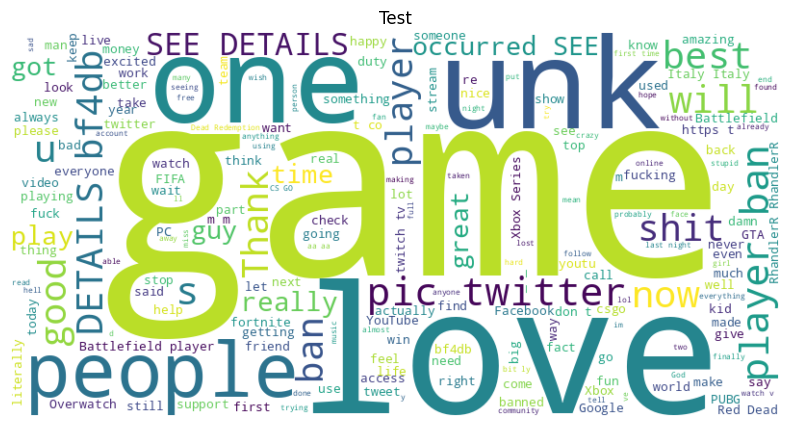

In [61]:

plot_wordcloud(irrelevant_text)
plt.show()

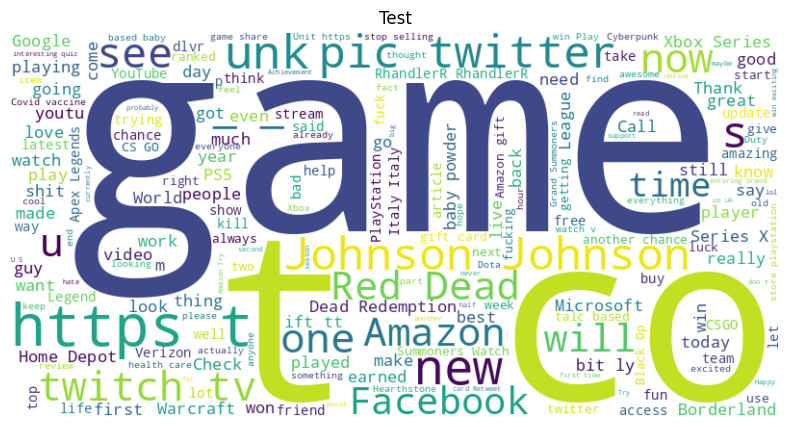

In [62]:
plot_wordcloud(neutral_text)
plt.show()

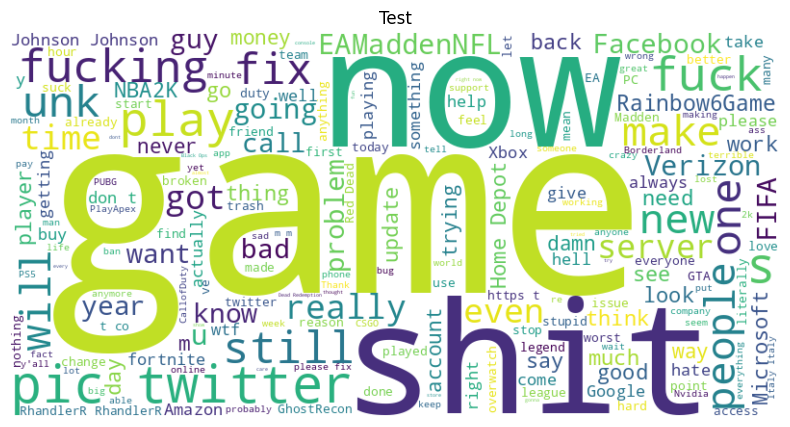

In [63]:
plot_wordcloud(negative_text)
plt.show()

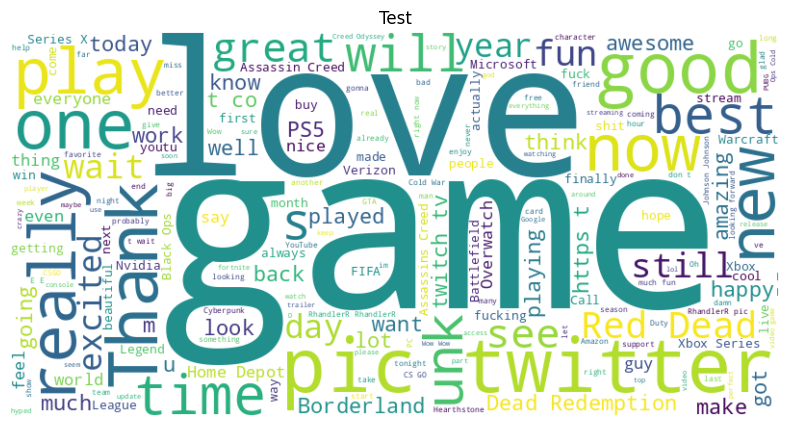

In [64]:
plot_wordcloud(positive_text)
plt.show()

**Preprocessing**

In [65]:

text_column = "text"
label_column = "sentiment_encoded"

In [66]:
import nltk
nltk.download('stopwords')

stopword = set(stopwords.words('english'))
stopword

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [67]:
def preprocess_text(text):
    # Remove punctuation
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = ''.join(remove_punc) # char joining

    #Remove stopwords
    text = ([word for word in clean_words.split() if word.lower() not in stopword]) # stopword = stopwords.words('english')
    return text

In [68]:

data[text_column] = data[text_column].apply(preprocess_text)
data[text_column]

,text
0,"[coming, borders, kill]"
1,"[im, getting, borderlands, kill]"
2,"[im, coming, borderlands, murder]"
3,"[im, getting, borderlands, 2, murder]"
4,"[im, getting, borderlands, murder]"
...,...
74676,"[realized, Windows, partition, Mac, like, 6, y..."
74677,"[realized, Mac, window, partition, 6, years, b..."
74678,"[realized, windows, partition, Mac, 6, years, ..."
74679,"[realized, windows, partition, Mac, like, 6, y..."


**Lemmatization**

In [69]:

import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  lemmatized_text = ''.join([lemmatizer.lemmatize(word) for word in text])
  return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [70]:
data[text_column]

,text
0,comingborderkill
1,imgettingborderlandkill
2,imcomingborderlandmurder
3,imgettingborderland2murder
4,imgettingborderlandmurder
...,...
74676,realizedWindowspartitionMaclike6yearbehindNvid...
74677,realizedMacwindowpartition6yearbehindNvidiadri...
74678,realizedwindowpartitionMac6yearbehindNvidiadri...
74679,realizedwindowpartitionMaclike6yearbehindNvidi...


**TF-IDF Vectorizer**

In [71]:

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data[text_column])
y = data[label_column]

In [72]:
x

<74681x69613 sparse matrix of type '<class 'numpy.float64'>'
	with 84677 stored elements in Compressed Sparse Row format>

In [73]:
y

,sentiment_encoded
0,3
1,3
2,3
3,3
4,3
...,...
74676,3
74677,3
74678,3
74679,3


**Train Test Split**

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Evaluate Model**

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model, x_test, y_test):
    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification report for more detailed metrics (precision, recall, f1-score)
    report = classification_report(y_test, y_pred)

    # Return the results in a dictionary
    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Classification Report': report
    }

**Logistic Regression**

In [101]:

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [114]:
# Evaluate the model
results = evaluate_model(lr_model, x_test, y_test)

# Print the results
print(f"Accuracy: {results['Accuracy'] * 100:.2f}%")
print("Confusion Matrix:")
print(results['Confusion Matrix'])
print("Classification Report:")
print(results['Classification Report'])

Accuracy: 45.34%
Confusion Matrix:
[[ 469 2118   33   41]
 [   2 4395   39   35]
 [   5 2756  771   19]
 [   7 3082   28 1137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.18      0.30      2661
           1       0.36      0.98      0.52      4471
           2       0.89      0.22      0.35      3551
           3       0.92      0.27      0.41      4254

    accuracy                           0.45     14937
   macro avg       0.78      0.41      0.40     14937
weighted avg       0.75      0.45      0.41     14937



In [116]:
cm = confusion_matrix(y_test, lr_model.predict(x_test))
cm

array([[ 469, 2118,   33,   41],
       [   2, 4395,   39,   35],
       [   5, 2756,  771,   19],
       [   7, 3082,   28, 1137]])

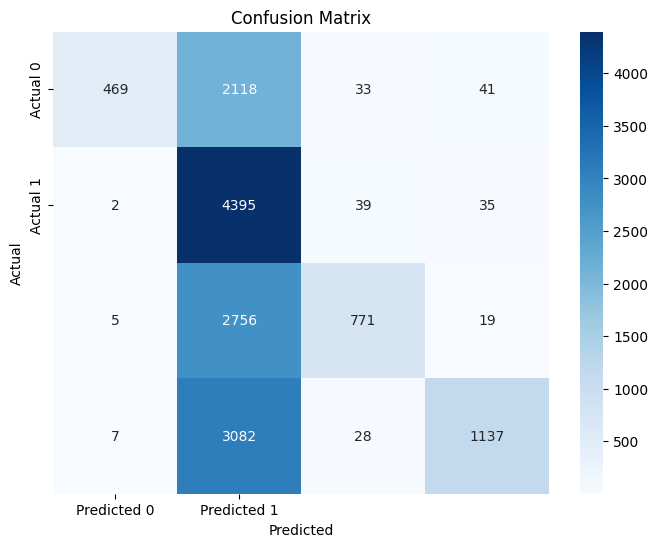

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [128]:
random_text = input()

preprocessed_text = preprocess_text(random_text) # remove punctuation
lemmatized_text = lemmatize_text(preprocessed_text) # text scaling
text_vector = vectorizer.transform([lemmatized_text])

love you then kill you bitch


In [129]:
prediction = lr_model.predict(text_vector)
prediction

array([1])

**Pickle**

In [130]:
import pickle

# Define a file path where you want to save the model
model_file_path = 'logistic_regression_model.pkl'

# Save the model to the file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(lr_model, model_file)